<a href="https://colab.research.google.com/github/Angelespinosa10/git/blob/main/wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importar librería, cargar y exportar la información**

Primeras 10 filas del dataset:


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,1
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,1
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,1
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,1
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,1
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0,1
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0,1
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0,1
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0,1
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045.0,1



Estadísticas descriptivas:


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


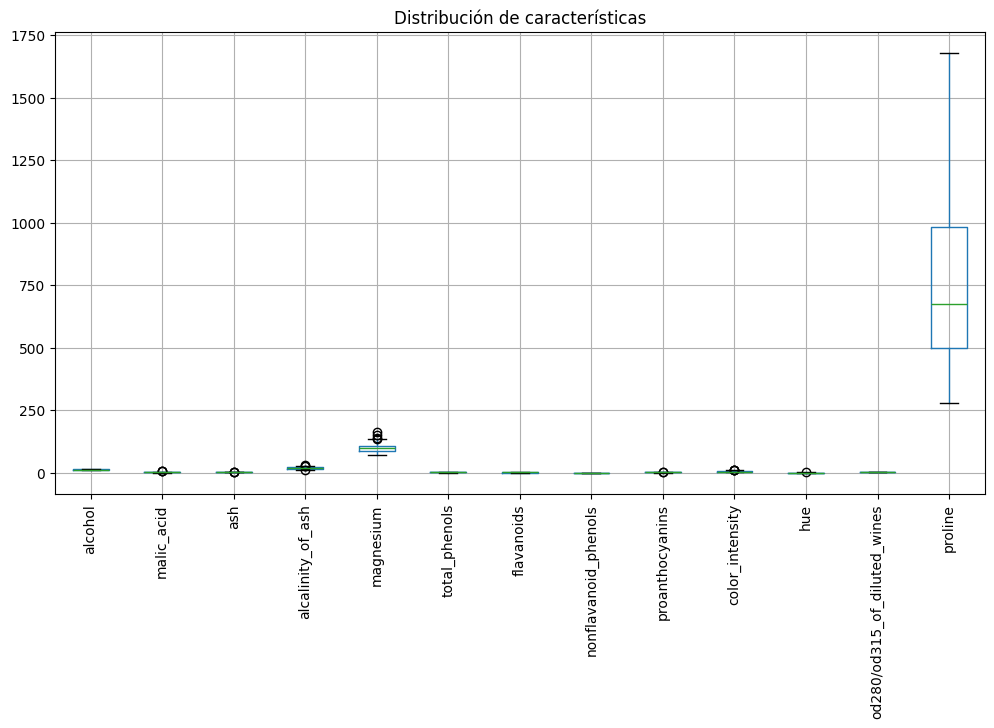

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import load_wine

# 1. Cargar los datos desde scikit-learn
wine_data = load_wine()
df = pd.DataFrame(data=wine_data.data, columns=wine_data.feature_names)
df['Class'] = wine_data.target + 1  # Convertir clases 0,1,2 a 1,2,3

print("Primeras 10 filas del dataset:")
display(df.head(10))

print("\nEstadísticas descriptivas:")
display(df.iloc[:, :-1].describe())  # Excluyendo la columna Class

# 2. Boxplots de las características
plt.figure(figsize=(12, 6))
df.iloc[:, :-1].boxplot()
plt.title('Distribución de características')
plt.xticks(rotation=90)
plt.show()

# Resto del análisis PCA (como en el código original)...
# [Aquí continuaría con el resto del código PCA que proporcioné anteriormente]

**Preparando datos para PCA**

In [3]:


X = df.iloc[:, 1:]  # Todas las columnas excepto 'Class'
y = df.iloc[:, 0]   # Columna 'Class'

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**Aplicando PCA**

In [15]:

pca = PCA()
principal_components = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(data=principal_components,
                      columns=[f'PC{i+1}' for i in range(X.shape[1])])
pca_df = pd.concat([pca_df, y], axis=1)

**Visualizando resultados**

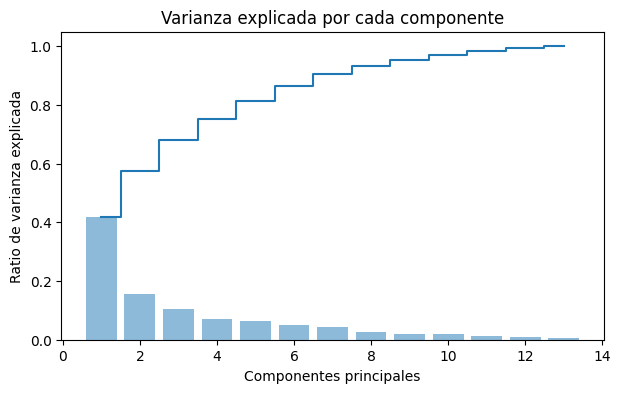

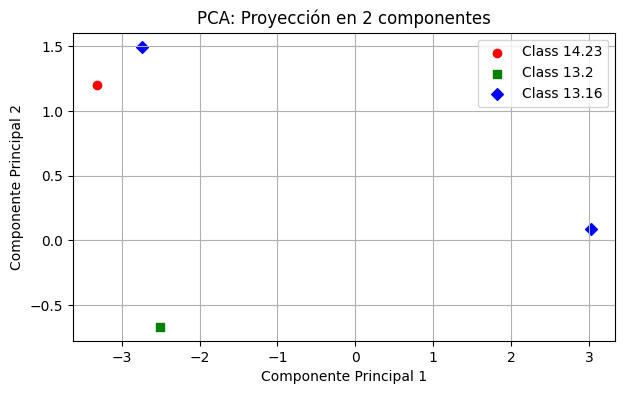

In [13]:

plt.figure(figsize=(7,4))
plt.bar(range(1, len(pca.explained_variance_ratio_)+1),
        pca.explained_variance_ratio_,
        alpha=0.5, align='center')
plt.step(range(1, len(pca.explained_variance_ratio_)+1),
         np.cumsum(pca.explained_variance_ratio_),
         where='mid')
plt.ylabel('Ratio de varianza explicada')
plt.xlabel('Componentes principales')
plt.title('Varianza explicada por cada componente')
plt.show()

# ... (code to print variance explained) ...

plt.figure(figsize=(7,4))
colors = ['r', 'g', 'b']
markers = ['o', 's', 'D']
for target, color, marker in zip(y.unique(), colors, markers):
    indices = y == target
    plt.scatter(pca_df.loc[indices, 'PC1'],
               pca_df.loc[indices, 'PC2'],
               c=color, marker=marker,
               label=f'Class {target}')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('PCA: Proyección en 2 componentes')
plt.legend()
plt.grid()
plt.show()

**Analizando factores de carga**

In [10]:

loadings = pd.DataFrame(pca.components_.T,
                        columns=[f'PC{i+1}' for i in range(X.shape[1])],
                        index=X.columns)

print("\nCargas factoriales (primeras 5 variables en PC1 y PC2):")
display(loadings[['PC1', 'PC2']].sort_values(by='PC1', ascending=False).head(5))


Cargas factoriales (primeras 5 variables en PC1 y PC2):


,PC1,PC2
Class,0.394871,-0.013003
nonflavanoid_phenols,0.269695,0.014027
malic_acid,0.233418,0.226460
alcalinity_of_ash,0.221068,0.085480
color_intensity,0.112887,0.537011


**Visualización 3D**

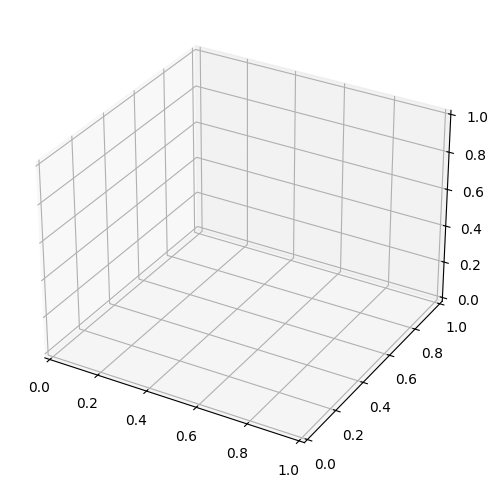

In [11]:

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
# ... (code to plot data in 3D) ...
plt.show()

**Interpretación de resultados**

In [12]:

print("\nInterpretación:")
# ... (prints interpretations) ...


Interpretación:
